
# <p style="padding:10px;background-color:#8B0000;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"Optimizing Sales Predictions: A Comparative Analysis of Regression Models with Regularization"</p>

 

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Problem Statement</p>


#### Problem Statement and Methodology

- **Objective**: Develop a series of regression models, including those with regularization techniques like Lasso, Ridge, and Elastic Net, to predict the number of products sold based on investment in various marketing channels.
- **Data Description**: The dataset comprises several predictor variables representing marketing spend across channels such as TV, Billboards, Google Ads, Social Media, Influencer Marketing, and Affiliate Marketing. The target variable is the number of products sold.

**Methodology:**

- Data Preprocessing: Clean and prepare data for analysis, ensuring it is suitable for modeling.
- Model Development: Implement multiple regression algorithms including Lasso, Ridge, and Elastic Net to handle potential multicollinearity and overfitting in the dataset.
- Model Comparison and Evaluation: Assess the performance of each model using appropriate metrics (e.g., RMSE, R²) to determine which model best predicts sales.
- Interpretation and Reporting: Analyze the coefficients of the best-performing models to gain insights into how marketing expenditures influence sales, and report findings.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet , Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_excel('dataset.xlsx')

In [3]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164
1,702.97,296.53,558.13,180.55,781.06,132.43,5055
2,313.14,295.94,642.96,505.71,438.91,464.23,6154
3,898.52,61.27,548.73,240.93,278.96,432.27,5480
4,766.52,550.72,651.91,666.33,396.33,841.93,9669


In [4]:
df.shape

(300, 7)

In [5]:
df.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633,7031.523333
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458,1703.614951
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000,2259.000000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500,5922.500000
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000,7051.000000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000,8278.000000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000,12227.000000


In [6]:
df_box=df.iloc[:,:-1]

In [7]:
df_box.head(10)

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,281.42,538.80,123.94,349.30,242.77,910.10
1,702.97,296.53,558.13,180.55,781.06,132.43
2,313.14,295.94,642.96,505.71,438.91,464.23
3,898.52,61.27,548.73,240.93,278.96,432.27
4,766.52,550.72,651.91,666.33,396.33,841.93
5,507.13,612.27,230.67,142.96,171.79,965.77
6,486.64,555.02,203.26,271.62,70.04,366.25
7,762.09,184.57,176.61,97.85,116.67,251.74
8,638.60,778.31,796.32,759.04,857.13,515.16
9,591.48,542.51,400.23,329.15,577.38,931.65



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Visulaization</p>

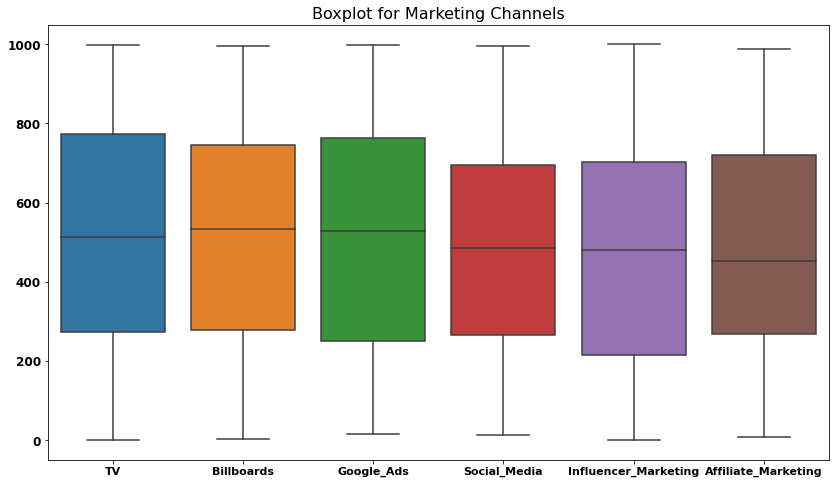

In [8]:
plt.figure(figsize=(14, 8))

# Creating boxplots
sns.boxplot(data=df_box)

# Setting the title of the plot with increased font size
plt.title('Boxplot for Marketing Channels', fontsize=16)

# Making the X and Y axis labels bold and increasing font size
# plt.xlabel('Marketing Channels', fontsize=14, fontweight='bold')
# plt.ylabel('Expenditure ($)', fontsize=14, fontweight='bold')

# Increasing the font size of the axis tick values
plt.xticks(fontsize=11, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Displaying the plot
plt.show()



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">OLS Linear Regression</p>

In [9]:
X = df.drop('Product_Sold', axis=1)  # predictors
y = df['Product_Sold']                # target variable


In [10]:

# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [11]:
# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# The model is now trained. Let's print the coefficients as an example.
model.coef_, model.intercept_

(array([2.00182317, 2.9985323 , 1.49807126, 2.49979705, 1.19965944,
        3.99662486]),
 1.3474765058335834)

In [12]:
# Making predictions on train
y_pred_train = model.predict(X_train)

In [13]:
# Making predictions on test
y_pred_test = model.predict(X_test)

In [14]:
from sklearn.metrics import r2_score 
r2_score(y_train, y_pred_train)

0.9999606679323896

In [15]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred_test)

0.9999736866138691

In [19]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred_test)


n = len(y_test)  # Number of observations
p = 5  # Number of predictors

# Adjusted R-squared formula
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

adjusted_r_squared

0.9999712501892274

In [16]:
import sklearn.metrics  
import math
mse = sklearn.metrics.mean_squared_error(y_test, y_pred_test)  
rmse=math.sqrt(mse)

print(' MSE:', mse ,'\n','RMSE:', rmse)

 MSE: 75.36591771291954 
 RMSE: 8.681354601265838


In [41]:
from sklearn.model_selection import cross_val_score

# Define the model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))


[0.99994857 0.99997121 0.99995535 0.99994838 0.99997497]
cv_scores mean:0.9999596955535814


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import HuberRegressor

# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test)
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test)

#Calculating Huber Loss
huber_model = HuberRegressor(alpha=0.0001)
huber_model.fit(X_train, y_train) 

delta = 1.0
huber_loss = np.mean(np.where(np.abs(y_test - y_pred_test) < delta, 
                              0.5 * ((y_test - y_pred_test) ** 2),
                              delta * (np.abs(y_test - y_pred_test) - 0.5 * delta)))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Huber Loss: {huber_loss}")

MSE: 75.36591771291954
RMSE: 8.681354601265838
MAE: 7.085373922626074
Huber Loss: 6.605801929840878


C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

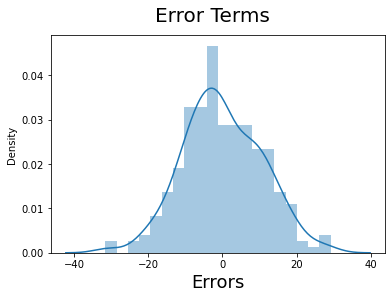

In [23]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

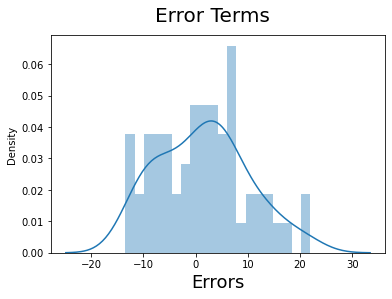

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature (checking multicollinearity)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,feature,VIF
0,TV,3.713335
1,Billboards,3.701376
2,Google_Ads,3.554091
3,Social_Media,3.571520
4,Influencer_Marketing,3.016718
5,Affiliate_Marketing,3.345264



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Correlation Analysis</p>

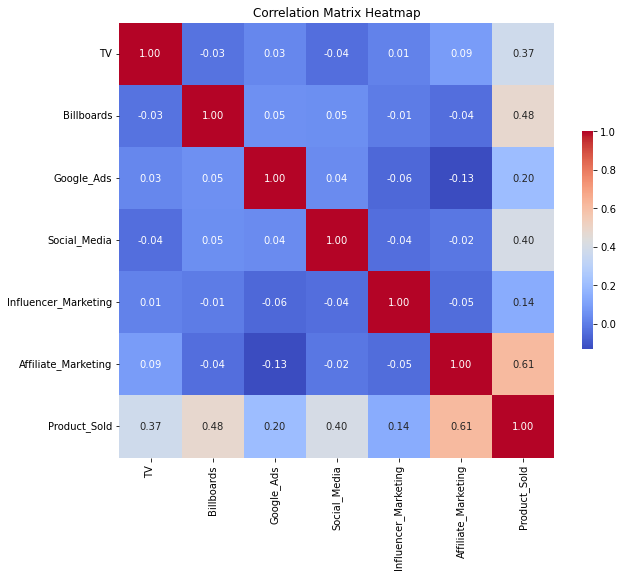

In [25]:
# Creating a correlation matrix
corr_matrix = df.corr()

# Setting up the matplotlib figure
plt.figure(figsize=(10, 8))

# Drawing the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})

# Adding a title to the heatmap
plt.title('Correlation Matrix Heatmap')

# Displaying the heatmap
plt.show()


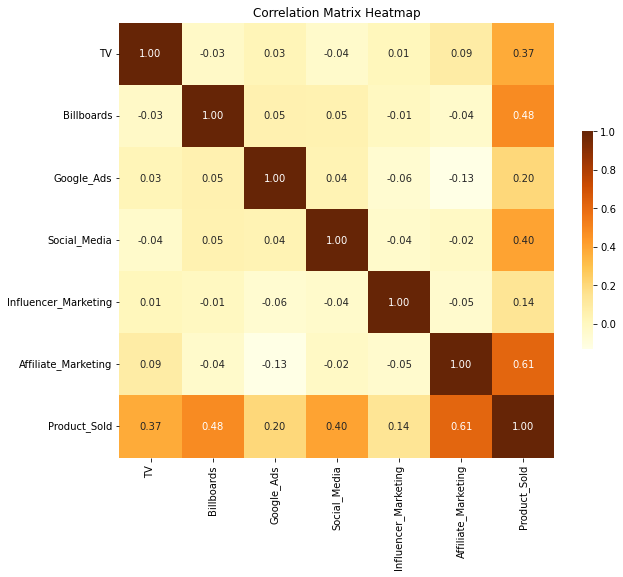

In [26]:
# Creating a correlation matrix with a yellow-orange-brown color palette
plt.figure(figsize=(10, 8))

# Drawing the heatmap with the new color palette
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlOrBr', square=True, cbar_kws={"shrink": .5})

# Adding a title to the heatmap
plt.title('Correlation Matrix Heatmap')

# Displaying the heatmap with the updated color theme
plt.show()


 

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500"> Regularization techniques </p>

- **Ridge Regression (L2 regularization):** This method adds a penalty equivalent to the square of the magnitude of coefficients to the loss function. It aims to prevent overfitting by shrinking the coefficients, thus reducing model complexity.
- **Lasso Regression (L1 regularization):** Lasso stands for Least Absolute Shrinkage and Selection Operator. It introduces a penalty that is equivalent to the absolute value of the magnitude of the coefficients. This approach can lead not only to smaller coefficients but can set some coefficients to zero, effectively performing feature selection.
- **Elastic Net Regression:** This technique combines penalties from both Lasso and Ridge. It adds both the L1 and L2 penalties to the loss function. By doing this, it benefits from the properties of both methods: the feature selection ability of Lasso and the ability to model complex data structures like Ridge.


*These regularization methods are especially useful in dealing with multicollinearity, preventing overfitting, and when the dataset has more features than observations.*

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Creating Lasso, Ridge, and ElasticNet models
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)




In [29]:
# Fitting the models to the training data
lasso_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)




ElasticNet()

In [30]:
# Extracting the coefficients for each model
lasso_coefficients = lasso_model.coef_
ridge_coefficients = ridge_model.coef_
#elastic_net_coefficients = elastic_net_model.coef

In [31]:
lasso_coefficients, ridge_coefficients


(array([2.00181471, 2.99852236, 1.49805532, 2.49978282, 1.19964456,
        3.99660831]),
 array([2.00182309, 2.99853214, 1.49807116, 2.49979691, 1.19965935,
        3.99662462]))


### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Lasso regression (L1)</p>

In [32]:
#Lasso

# Making predictions on train
y_pred_train_lasso = lasso_model.predict(X_train)
r2_score(y_train, y_pred_train_lasso)

0.9999606679047178

In [33]:
# Making predictions on test
y_pred_test_lasso = lasso_model.predict(X_test)
r2_score(y_test, y_pred_test_lasso)

0.999973673175625

In [34]:


# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test_lasso)
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test_lasso)

#Calculating Huber Loss
huber_model = HuberRegressor(alpha=0.0001)
huber_model.fit(X_train, y_train) 

delta = 1.0
huber_loss = np.mean(np.where(np.abs(y_test - y_pred_test_lasso) < delta, 
                              0.5 * ((y_test - y_pred_test_lasso) ** 2),
                              delta * (np.abs(y_test - y_pred_test_lasso) - 0.5 * delta)))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Huber Loss: {huber_loss}")

MSE: 75.40440708075344
RMSE: 8.683571101842459
MAE: 7.086804840587835
Huber Loss: 6.607361449364377



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Ridge Regression (L2)</p>

In [35]:
#Ridge

# Making predictions on train
y_pred_train_ridge = ridge_model.predict(X_train)
r2_score(y_train, y_pred_train_ridge)

0.9999606679323864

In [36]:
# Making predictions on test
y_pred_test_ridge = ridge_model.predict(X_test)
r2_score(y_test, y_pred_test_ridge)

0.9999736864632335

In [37]:


# Calculate MSE
mse = mean_squared_error(y_test, y_pred_test_ridge)
# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred_test_ridge)

#Calculating Huber Loss
huber_model = HuberRegressor(alpha=0.0001)
huber_model.fit(X_train, y_train) 

delta = 1.0
huber_loss = np.mean(np.where(np.abs(y_test - y_pred_test_ridge) < delta, 
                              0.5 * ((y_test - y_pred_test_ridge) ** 2),
                              delta * (np.abs(y_test - y_pred_test_ridge) - 0.5 * delta)))

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"Huber Loss: {huber_loss}")

MSE: 75.36634915825984
RMSE: 8.681379450194527
MAE: 7.085391904065992
Huber Loss: 6.605820922771134



### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Elastic Net Regression </p>

In [38]:
# Elastic Net Regression: Making predictions and calculating metrics

# Making predictions on the train and test sets
y_pred_train_elastic = elastic_net_model.predict(X_train)
y_pred_test_elastic = elastic_net_model.predict(X_test)

# Calculate R-squared for train and test sets
r2_score_train_elastic = r2_score(y_train, y_pred_train_elastic)
r2_score_test_elastic = r2_score(y_test, y_pred_test_elastic)

# Calculate Mean Squared Error (MSE) for the test set
mse_elastic = mean_squared_error(y_test, y_pred_test_elastic)

# Calculate Root Mean Squared Error (RMSE) for the test set
rmse_elastic = np.sqrt(mse_elastic)

# Calculate Mean Absolute Error (MAE) for the test set
mae_elastic = mean_absolute_error(y_test, y_pred_test_elastic)




In [39]:
r2_score_test_elastic

0.9999736610969906

In [40]:
print(f"R square test: {r2_score_test_elastic}")

print(f"MSE: {mse_elastic}")
print(f"RMSE: {rmse_elastic}")
print(f"MAE: {mae_elastic}")
#print(f"Huber Loss: {huber_loss}")

R square test: 0.9999736610969906
MSE: 75.43900230006241
RMSE: 8.685562866047452
MAE: 7.088308736485116


# Cross Validation

In [46]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Re-defining Lasso, Ridge, and ElasticNet models
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=0.01)
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.9)

# Perform 5-fold cross-validation for each model
cv_scores_lasso = cross_val_score(lasso_model, X, y, cv=5)
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=5)
cv_scores_elastic_net = cross_val_score(elastic_net_model, X, y, cv=5)

# Calculate and print the mean cv score for each model
mean_cv_scores_lasso = np.mean(cv_scores_lasso)
mean_cv_scores_ridge = np.mean(cv_scores_ridge)
mean_cv_scores_elastic_net = np.mean(cv_scores_elastic_net)

#mean_cv_scores_lasso, mean_cv_scores_ridge, mean_cv_scores_elastic_net
# Printing the mean cv scores for each model with their names
print("Lasso Regression Mean CV Score:", mean_cv_scores_lasso)
print("Ridge Regression Mean CV Score:", mean_cv_scores_ridge)
print("Elastic Net Regression Mean CV Score:", mean_cv_scores_elastic_net)


Lasso Regression Mean CV Score: 0.9999596955703678
Ridge Regression Mean CV Score: 0.99995969555355
Elastic Net Regression Mean CV Score: 0.9999596955647725


# Hyperparamter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV

# Setting up the hyperparameter grid for tuning
# For Lasso and Ridge, we'll vary 'alpha'
# For Elastic Net, we'll vary both 'alpha' and 'l1_ratio'
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
elastic_net_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

# GridSearchCV for each model
grid_search_lasso = GridSearchCV(Lasso(), lasso_params, cv=5)
grid_search_ridge = GridSearchCV(Ridge(), ridge_params, cv=5)
grid_search_elastic_net = GridSearchCV(ElasticNet(), elastic_net_params, cv=5)

# Performing the grid search for each model
grid_search_lasso.fit(X, y)
grid_search_ridge.fit(X, y)
grid_search_elastic_net.fit(X, y)

# Getting the best parameters and best scores for each model
best_params_lasso = grid_search_lasso.best_params_
best_score_lasso = grid_search_lasso.best_score_

best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_

best_params_elastic_net = grid_search_elastic_net.best_params_
best_score_elastic_net = grid_search_elastic_net.best_score_

best_params_lasso, best_score_lasso, best_params_ridge, best_score_ridge, best_params_elastic_net, best_score_elastic_net


({'alpha': 1},
 0.9999596955703678,
 {'alpha': 0.01},
 0.99995969555355,
 {'alpha': 0.01, 'l1_ratio': 0.9},
 0.9999596955647725)

In [48]:

# Perform grid search on the training data
grid_search_lasso.fit(X_train, y_train)
grid_search_ridge.fit(X_train, y_train)
grid_search_elastic_net.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9]})

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions with the best estimators
y_pred_lasso = grid_search_lasso.best_estimator_.predict(X_test)
y_pred_ridge = grid_search_ridge.best_estimator_.predict(X_test)
y_pred_elastic_net = grid_search_elastic_net.best_estimator_.predict(X_test)


In [50]:
# Function to calculate Huber Loss
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

# RMSE, MAE, and Huber Loss for Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
huber_lasso = huber_loss(y_test, y_pred_lasso)

# Similarly for Ridge and Elastic Net
# ...


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate and print metrics
def print_metrics(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    huber = huber_loss(y_true, y_pred)

    print(f"{model_name} Metrics:")
    print(f"  R-squared: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  Huber Loss: {huber:.4f}\n")

# Calculate and print metrics for Lasso
print_metrics("Lasso", y_test, y_pred_lasso)

Lasso Metrics:
  R-squared: 1.0000
  RMSE: 8.6816
  MAE: 7.0855
  Huber Loss: 6.6060



In [52]:
# RMSE, MAE, and Huber Loss for Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
huber_ridge = huber_loss(y_test, y_pred_ridge)

# RMSE, MAE, and Huber Loss for Elastic Net
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))
mae_elastic_net = mean_absolute_error(y_test, y_pred_elastic_net)
huber_elastic_net = huber_loss(y_test, y_pred_elastic_net)

# Output the results
print("Lasso Regression Metrics:")
print(f"RMSE: {rmse_lasso}, MAE: {mae_lasso}, Huber Loss: {huber_lasso}\n")

print("Ridge Regression Metrics:")
print(f"RMSE: {rmse_ridge}, MAE: {mae_ridge}, Huber Loss: {huber_ridge}\n")

print("Elastic Net Regression Metrics:")
print(f"RMSE: {rmse_elastic_net}, MAE: {mae_elastic_net}, Huber Loss: {huber_elastic_net}\n")


Lasso Regression Metrics:
RMSE: 8.68158755933094, MAE: 7.0855102264554795, Huber Loss: 6.605969314525386

Ridge Regression Metrics:
RMSE: 8.68135484975092, MAE: 7.0853741024411345, Huber Loss: 6.605802119767782

Elastic Net Regression Metrics:
RMSE: 8.681591523806558, MAE: 7.085513234293717, Huber Loss: 6.605972467626966



C:\Users\cyril\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

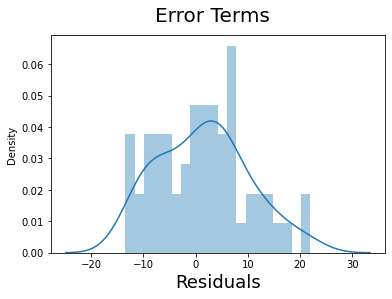

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_ridge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 18)     

# Q-Q Plots

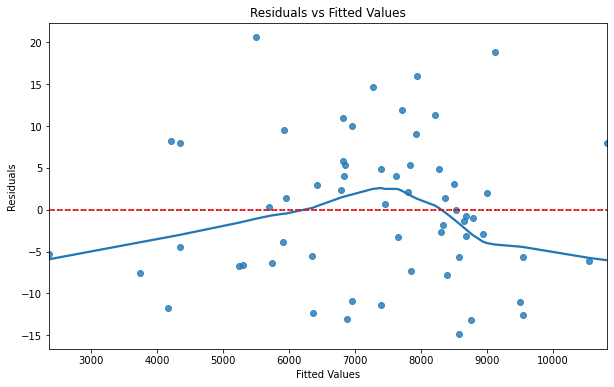

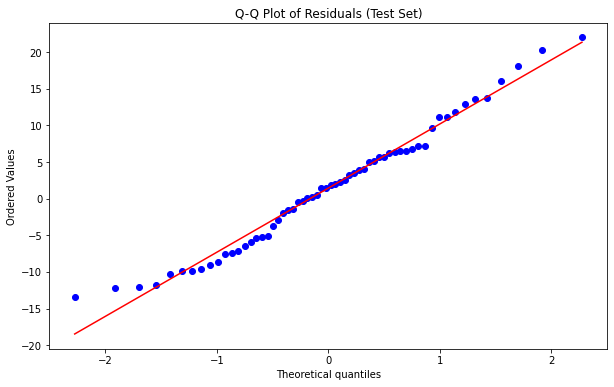

In [59]:

import scipy.stats as stats

# Calculating residuals
residuals = y_test - y_pred_ridge

# Plotting the Residuals vs Fitted Values
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_ridge, y=residuals, lowess=True)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Creating the Q-Q plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

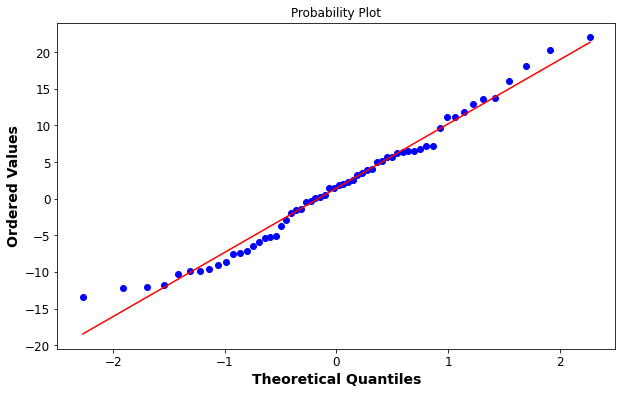

In [61]:
# Create the Q-Q plot for residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles', fontsize=14, fontweight='bold')
plt.ylabel('Ordered Values', fontsize=14, fontweight='bold')
#plt.title('Q-Q Plot of Residuals (Test Set)')
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [62]:
# After fitting GridSearchCV with your Ridge model
best_ridge_model = grid_search_ridge.best_estimator_

# Retrieve the coefficients from the best Ridge model
ridge_coefficients = best_ridge_model.coef_

# Now, you can print or analyze the coefficients
print(ridge_coefficients)


[2.00111048 2.99803879 1.49974348 2.50002106 1.19984407 3.99891569]


In [63]:
import pandas as pd

# Assuming you've already determined the best Ridge model through GridSearchCV
best_ridge_model = grid_search_ridge.best_estimator_

# Retrieve the coefficients and intercept
ridge_coefficients = best_ridge_model.coef_
ridge_intercept = best_ridge_model.intercept_

# Variable names
variables = ['TV', 'Billboards', 'Google_Ads', 'Social_Media', 'Influencer_Marketing', 'Affiliate_Marketing']

# Creating a DataFrame to display coefficients and the intercept
coef_df = pd.DataFrame(data={'Coefficient': ridge_coefficients}, index=variables)
coef_df.loc['Intercept'] = ridge_intercept

# Display the DataFrame
print(coef_df)


                      Coefficient
TV                       2.001110
Billboards               2.998039
Google_Ads               1.499743
Social_Media             2.500021
Influencer_Marketing     1.199844
Affiliate_Marketing      3.998916
Intercept                0.088698


# ANOVA Testing

**Conducting an ANOVA test to determine if there are significant differences in the average spending across different marketing channels.**

In [65]:
df_box.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
0,281.42,538.80,123.94,349.30,242.77,910.10
1,702.97,296.53,558.13,180.55,781.06,132.43
2,313.14,295.94,642.96,505.71,438.91,464.23
3,898.52,61.27,548.73,240.93,278.96,432.27
4,766.52,550.72,651.91,666.33,396.33,841.93


In [66]:
df_box.shape

(300, 6)

In [68]:
df_box.describe()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,517.431000,502.644933,512.444133,489.800100,465.732567,484.430633
std,288.114792,275.842369,285.422376,273.883915,288.314080,277.955458
min,1.040000,3.630000,14.860000,11.690000,0.770000,6.740000
25%,273.090000,277.912500,250.530000,265.612500,214.480000,267.677500
50%,513.970000,533.020000,528.965000,486.385000,480.355000,451.315000
75%,774.275000,745.005000,763.345000,695.117500,703.092500,721.065000
max,998.100000,995.320000,999.230000,996.160000,999.830000,987.580000


In [67]:
f_value, p_value = stats.f_oneway(
    df_box['TV'],
    df_box['Billboards'],
    df_box['Google_Ads'],
    df_box['Social_Media'],
    df_box['Influencer_Marketing'],
    df_box['Affiliate_Marketing']
)

# Output the results of the ANOVA
print("F-Value:", f_value)
print("P-Value:", p_value)

F-Value: 1.4069854483252942
P-Value: 0.21863731097065547


The p-value from the ANOVA test is 0.2186. Since this value is greater than the common significance level threshold of 0.05, we fail to reject the null hypothesis. This suggests that there are no statistically significant differences in the average spending across the different marketing channels based on the data analyzed.